# Test with TD Learning
The following program demonstrates _Temporal Difference Learning_. We begin with a 1D maze which contains a single goal. Each section of the maze can be thought of as a __state__. We set the reward for the goal to one, and the reward for all other states to zero. We then drop the __agent__ into a random state, and let it search for the goal. Each time the goal is found the __value__ of the states used to get there will update to show the most efficient path.

Epoch is set to the amount of times the agent will be dropped into a state to find the goal. Goal is set to which state in the maze represents the goal.

Try out adjusting the length of the 1D Maze:

In [25]:
import random
from fractions import Fraction
import numpy as np

LENGTH = 14  # Try me out
GAMMA = .5
GOAL = 0
EPOCH = 100

class Maze:

    def __init__(self):
        self._reward = np.zeros(LENGTH)  # Reward Vector
        self._value = np.zeros(LENGTH) #np.ones(LENGTH, dtype='int')         # Value Vector
        self._reward[GOAL] = 1
        self.final_value = np.zeros(LENGTH) # Vector NOT used in learning.
                                            # Soley used to see how many episodes required to train
        
        # fill self._finalvalue
        for i in range(LENGTH):
            distance = np.abs(GOAL-i)
            # account for wraping
            if ((np.abs(GOAL + LENGTH) - i) < distance):
                distance = np.abs(GOAL + LENGTH) - i
            self.final_value[i] = GAMMA ** distance

    # Disply the maze with current values inside
    def display(self):
        print(" ------" * LENGTH)
        
        print("|", end='')
        for i in range(LENGTH):
            print(" %4s |" %Fraction(self._value[i]), end='')
        print()
        print(" ------" * LENGTH)
        for i in range(LENGTH):
            print("  ", i, "  ", end='')
        print()
        return

    # Drop agent into maze and search for goal
    def episode(self, s):
        # Search and update value until reaches goal
        while(s != GOAL):            
            self._value[s] += self.delta(s)
            # Move to next state
            s = self._nextS(s)
        self._value[s] += self.delta(s)

        return

    # delta(s) = (r(s) + gamma v(s + 1)) - v(s)
    def delta(self, s):
        if (s == GOAL):
            future_val = 0.0
        else:
            future_val = GAMMA * self.v(self._nextS(s))
        term = self._reward[s] + future_val
        return term - self._value[s]
    
    # V(s) = v(s) + gamma V(s+1)
    def v(self, s):
        if (s == GOAL):
            return self._value[GOAL]
        else:
            return self._reward[s] + (GAMMA * self._value[self._nextS(s)])

    # Obtain the next state to  be moved to
    def _nextS(self, s):
        # determine left and right values (accounting for wrap around)
        if (s == 0):
            left = (LENGTH-1)
            right = s + 1
        elif (s == (LENGTH-1)):
            left = s - 1
            right = 0
        else:
            left = s - 1
            right = s + 1

        # determine whether to go left or right
        if (self._value[left] >= self._value[right]):
            nextS = left
        else:
            nextS = right

        return nextS
    
    # Obtain the matrix of state values
    def get_values(self):
        return self._value

The goal is 0
 ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------
|    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |
 ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------
   0      1      2      3      4      5      6      7      8      9      10      11      12      13   
Maze after completion:
 ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------
|    1 |  1/2 |  1/4 |  1/8 | 1/16 | 1/32 | 1/64 | 1/128 | 1/64 | 1/32 | 1/16 |  1/8 |  1/4 |  1/2 |
 ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------
   0      1      2      3      4      5      6      7      8      9      10      11      12      13   
Elapsed episodes: 121


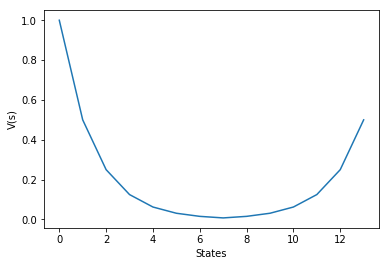

In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

maze = Maze()
print("The goal is", GOAL)
maze.display()

done = False
i = 0
while (not done):
    i += 1
    s = random.randint(0, LENGTH-1)
    maze.episode(s)
    if (np.array_equal(maze.get_values(), maze.final_value)):
        done = True


print("Maze after completion:")
maze.display()

print("Elapsed episodes:", i)

# Plot the results
v = maze.get_values()
states = np.linspace(0, LENGTH-1, LENGTH)
plt.plot(states, v)
plt.xlabel("States")
plt.ylabel("V(s)")
plt.show()